In [1]:
from collections import defaultdict
import pandas as pd
import autograd.numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score
from sklearn import metrics
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import rcParams
import autograd
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib
from math import exp
from sklearn.datasets import load_svmlight_file
from libsvm.svmutil import *
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import multiprocessing 
from itertools import product


regress_plotter = superlearn.lin_regression_demos
optimizers = optlib.optimizers
static_plotter = optlib.static_plotter.Visualizer();

### Problem 1

In [2]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')

x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(1, 11)
(1, 11)


In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_least_squares(w):
    cost = 0
    for p in range(y.size):
        x_p = x[:,p]
        y_p = y[:,p]
        cost += (sigmoid(w[0] + w[1]*x_p) - y_p)**2
    return cost/y.size

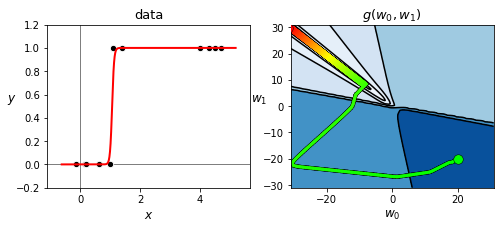

In [4]:
opt = superlearn.optimizers.MyOptimizers()

w = np.asarray([20.0,-20.0])[:,np.newaxis]
w_hist = opt.gradient_descent(g = sigmoid_least_squares,w = w,version = 'normalized',max_its = 900, alpha = 1)
demo2 = superlearn.classification_2d_demos_entropy.Visualizer(data,sigmoid_least_squares)
demo2.static_fig(w_hist,num_contours = 25,viewmax = 31)

#### Problem 2
The multi-class-perceptron cost is

$
g\left(w_0,...,w_{C-1}\right) = \frac{1}{P}\sum_{p = 1}^P \left[ \left(\underset{c \,=\, 0,...,C-1}{\text{max}} \,\,\,\mathring{x}_{p}^T \overset{\,}{w}_c^{\,}\right) - \mathring{x}_{p}^T \overset{\,}{w}_{y_p}^{\,}\right]
$

In its expanded form, we see that the cost equation is:

$
g\left(\mathbf{w}_0,...,\mathbf{w}_{C-1}\right) = \frac{1}{P}\sum_{p = 1}^P \left[\underset{ \underset{j \neq y_p }{ j \,=\, 0,...,C-1}  }{\text{max}} \left(0,\mathring{\mathbf{x}}_{p}^T\left( \overset{\,}{\mathbf{w}}_j^{\,} - \overset{\,}{\mathbf{w}}_{y_p}^{\,}\right)\right)\right]
$

To reduce this to the two class perceptron equation, we will only consider weights $w_0$ and $w_1$.

So, we get

$
g\left(\mathbf{w}_0,\mathbf{w}_1\right) = \frac{1}{P}\sum_{p = 1}^P \left[\underset{ \underset{j \neq y_p }{ j \,=\, 0,1}  }{\text{max}} \left(0,\mathring{\mathbf{x}}_{p}^T\left( \overset{\,}{\mathbf{w}}_{0,1}^{\,} - \overset{\,}{\mathbf{w}}_{y_p}^{\,}\right)\right)\right]
$

As we have 2 classes, the boundary is a line where if $\mathring{\mathbf{x}}_{p}^T > 0$, the point is above the hyperplane and if $\mathring{\mathbf{x}}_{p}^T < 0$, the point lies below the hyperplane.

Therefore as far as possible, we will have $\mathring{\mathbf{x}}_{p}^T > 0$ if $y_p = +1$ and $\mathring{\mathbf{x}}_{p}^T > 0$ if $y_p = -1$

As we're considering only 2 classes in the perceptron cost, we can say that if a positive value, is returned, the point was incorrectly classified as $w_j \neq w_{yp}$, and if the value returns 0, the value was correctly classified as $w_j = w_{yp}$


Therefore we can further generalize this by saying that $-y_p \mathring{\mathbf{x}}_{p}^T < 0$
As we are considering 2 class classification, we can plug this into the final perceptron cost equation to reduce it to the two class perceptron cost equation as follows
$
g\left(\mathbf{w}\right) = \frac{1}{P}\sum_{p=1}^P\text{max}\left(0,-\overset{\,}{y}_{p}\mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,}\right).
$

#### Problem 3
a) We can consider the general form of ridge regression optimization ->
Minimize
$
\sum_{i=1}^{n}\left(y_i - \hat{\beta}_0 \sum_{j=1}^{p}\hat{\beta}_jx_j\right)^2 + \lambda \sum_{i=1}^{p} \hat{\beta}_j^2
$
Let $x_{11} = x_{12} = x_1$ and $x_{21} = x_{22} = x_2$. We know that $ \hat{\beta}_0 = 0 $ and n = p = 2. Therefore the final optimization problem is

Minimize
$
(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2 + \lambda(\hat{\beta}_1^2 + \hat{\beta}_2^2).
$


b) To prove that $\hat{\beta}_1 = \hat{\beta}_2$, we take the derivative of the above optimization problem first wrt. $\hat{\beta}_1$ and then wrt. $\hat{\beta}_2$ and set them both equal to 0

1) $\hat{\beta}_1 = \frac{\displaystyle x_1y_1 + x_2y_2 - \hat{\beta}_2\left(x_1^2 + x_2^2\right)}{\displaystyle x_1^2 + x_2^2 + \lambda} $

2) $\hat{\beta}_2 = \frac{\displaystyle x_1y_1 + x_2y_2 - \hat{\beta}_1\left(x_1^2 + x_2^2\right)}{\displaystyle x_1^2 + x_2^2 + \lambda} $

Subtracting equation 2 from equation 1, we get $\hat{\beta}_1 = \hat{\beta}_2$


c) Let $x_{11} = x_{12} = x_1$ and $x_{21} = x_{22} = x_2$
 
The lasso optimization problem is

Minimize $(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|)$


d) We can consider $(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_1)^2 + (y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2$ subject to the constraint $|\hat{\beta}_1| + |\hat{\beta}_2| < s$.
We get a diamond with center at origin of the plane($\hat{\beta}_1, \hat{\beta}_2$).

Considering the given setting $x_{11} = x_{12} = x_1$, $x_{21} = x_{22} = x_2$, $x_1 + x_2 = 0$ and $y_1 + y_2 = 0$ we will minimize the expression,

$2[y_1 - (\hat{\beta}_1 + \hat{\beta}_2)x_1]^2\ge 0$

The simple solution to this optimization is $\displaystyle \hat{\beta}_1 + \hat{\beta}_2 = \frac{y_1}{x_1}$

This is a line parallel to the diamond edge $\hat{\beta}_1 + \hat{\beta}_2 = s$
Original solutions to the lasso problem are its contours $[y_1 - (\hat{\beta}_1 + \hat{\beta}_2)x_1]^2$ which intersect this diamond. Therefore the entire edge $\hat{\beta}_1 + \hat{\beta}_2 = s$ is a set of valid solutions. Therefore, the opposite edge $\hat{\beta}_1 + \hat{\beta}_2 = -s$ is also a set of solutions. Therefore, the lasso optimization problem does not have a unique solution. The general form of a possible solution is $\hat{\beta}_1 + \hat{\beta}_2 = s; \hat{\beta}_1 \ge s; \hat{\beta}_2 \ge s$ and $\hat{\beta}_1 + \hat{\beta}_2 = -s; \hat{\beta}_1 \le s; \hat{\beta}_2 \le s$


#### Problem 3

In [5]:
heart_data = pd.read_csv("heart_input.csv")
heart_data.dropna(inplace = True)
labels = heart_data['heart disease']
features = heart_data.drop('heart disease',axis=1)
non_numerical = features.select_dtypes(exclude=['int64', 'float64'])                                                                                                         
numerical = features.select_dtypes(include=['int64', 'float64'])                                                                                                         
labels = labels.replace({'No':0,'Yes':1})                                                                                                                                                              
non_numerical = pd.get_dummies(non_numerical)                                                                                                                                 
features = pd.concat([non_numerical, numerical], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
max_iter = 1e8

def lambda_aucs (model, lambda_vals, x_train, y_train, x_test, y_test):
    auc = []
    
    for lambda_ in lambda_vals:
        
        if model== "ridge":
            estimator = Ridge(max_iter = max_iter, alpha = lambda_)
        elif model == "lasso":
            estimator = Lasso(max_iter = max_iter, alpha = lambda_)
            
        estimator.fit(x_train, y_train)
        preds = estimator.predict(x_test)
        
        auc.append(roc_auc_score(y_test, preds))

    return auc

n_bootstraps = int(1e3)

n_test  = int(0.2*len(features))
n_train = len(features) - n_test

lambda_vals = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

aucs         = {"ridge":[], "lasso":[]}

for _ in range(n_bootstraps):
    train_test_indicator = np.asarray([True]*n_train + [False]*n_test)
    np.random.shuffle(train_test_indicator)
    
    x_train, x_test, y_train, y_test = features[train_test_indicator], features[np.logical_not(train_test_indicator)], labels[train_test_indicator], labels[np.logical_not(train_test_indicator)]
    
    ridge_lambda_auc = lambda_aucs ("ridge", lambda_vals, x_train, y_train, x_test, y_test)
    lasso_lambda_auc = lambda_aucs ("lasso", lambda_vals, x_train, y_train, x_test, y_test)
    
    aucs ["ridge"].append(ridge_lambda_auc)
    aucs ["lasso"].append(lasso_lambda_auc)

lasso_model = Lasso().fit(X_train, y_train)
ridge_model = Ridge().fit(X_train, y_train)

print("lasso:", lasso_model.coef_)
print("ridge:", ridge_model.coef_)


lasso: [-0.         0.        -0.         0.         0.         0.
 -0.         0.         0.        -0.        -0.        -0.
  0.         0.        -0.         0.         0.         0.
 -0.        -0.         0.         0.0003354  0.        -0.
 -0.       ]
ridge: [-4.78591344e-02  4.78591344e-02 -1.22148086e-01  5.51913883e-02
  3.49232334e-02  3.20334647e-02  1.43907173e-02 -1.43907173e-02
  1.82238988e-01 -1.88449596e-01  6.21060856e-03 -8.62434428e-02
  8.62434428e-02 -2.97636631e-02 -1.67969004e-02  4.65605635e-02
  1.47406289e-01 -5.37991210e-02 -9.36071684e-02 -1.30067669e-03
  1.27765068e-03  4.83249953e-04  1.76079932e-04  2.55945625e-02
 -4.66875681e-02]


2) The coefficients for both models are printed above. There is a huge difference in the coefficients between the Lasso and Ridge models. The Lasso model tends to reduce ceofficients to absolute zero by adding a penalty to reduce loss. Ridge models on the other hand minimizes coefficients by using the lambda value to make them  tend towards zero. However ridge regression does not completely make coefficients zero.

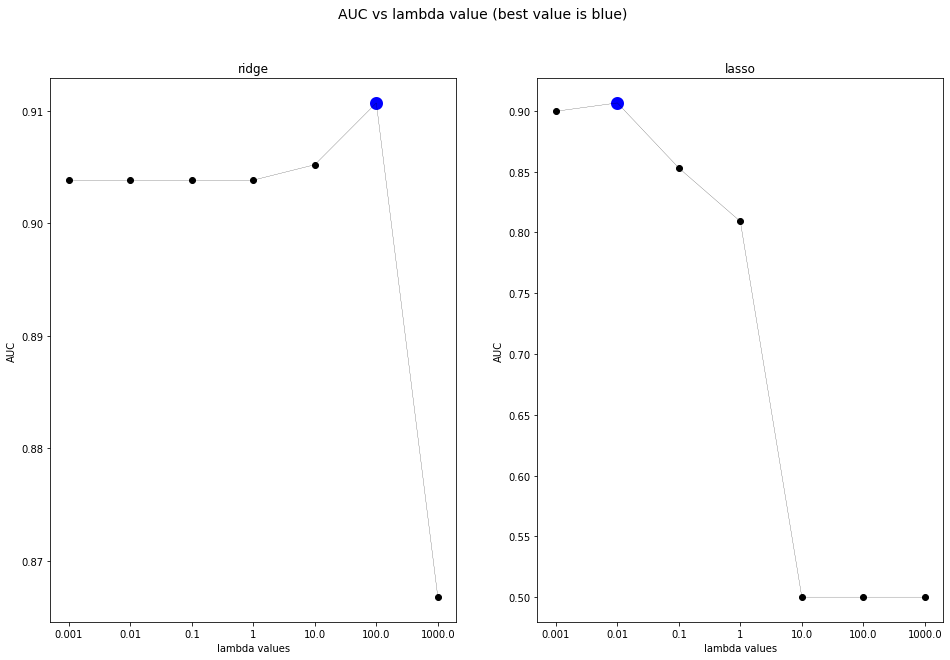

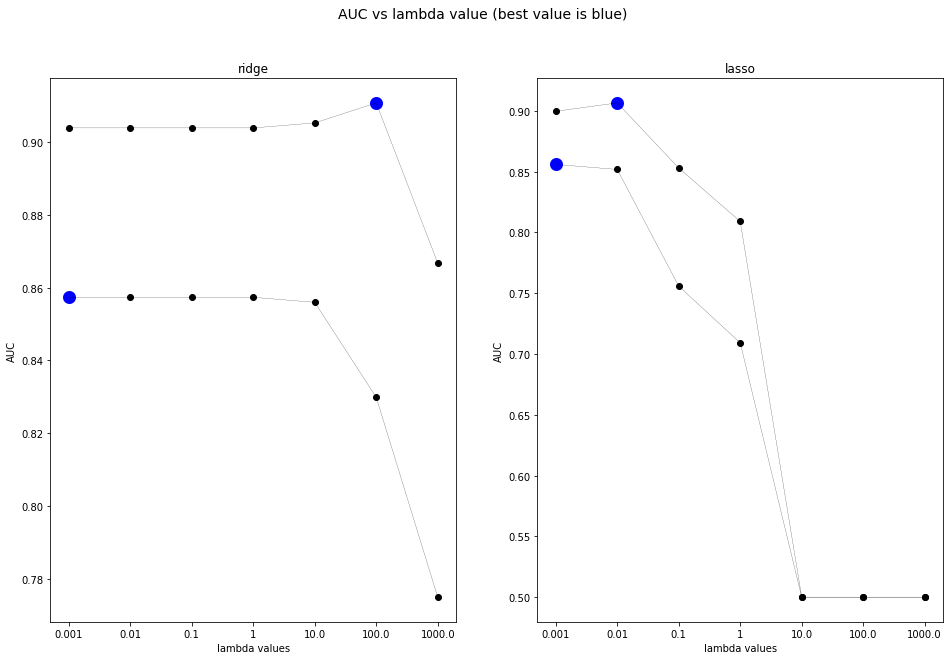

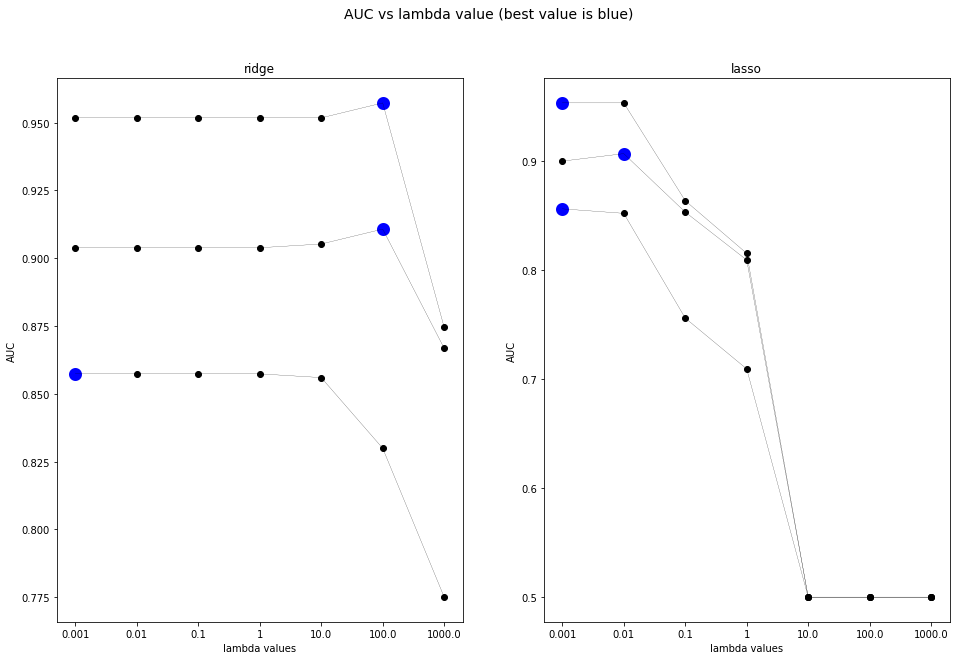

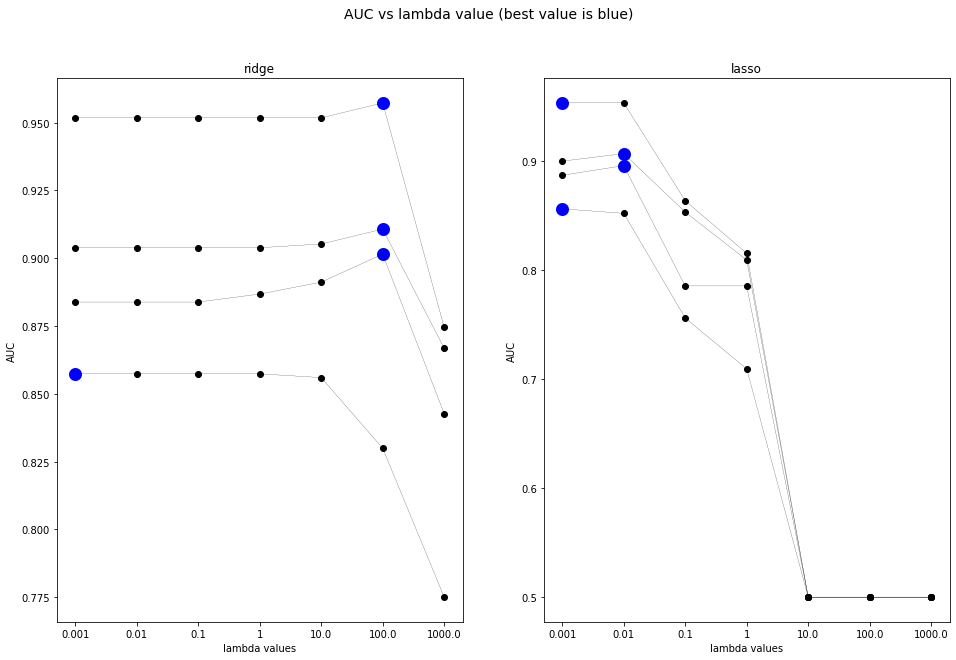

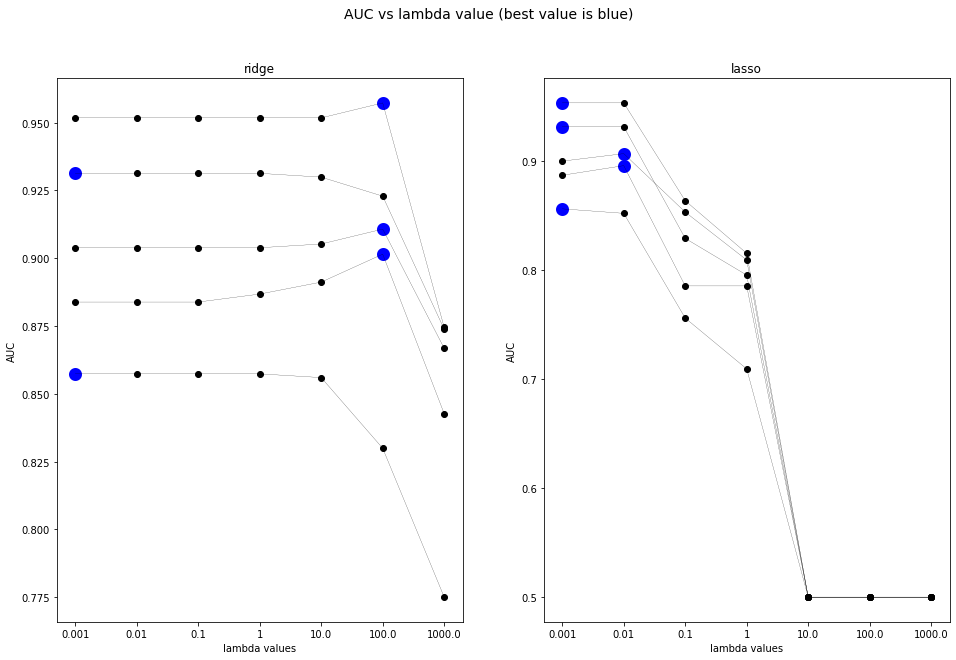

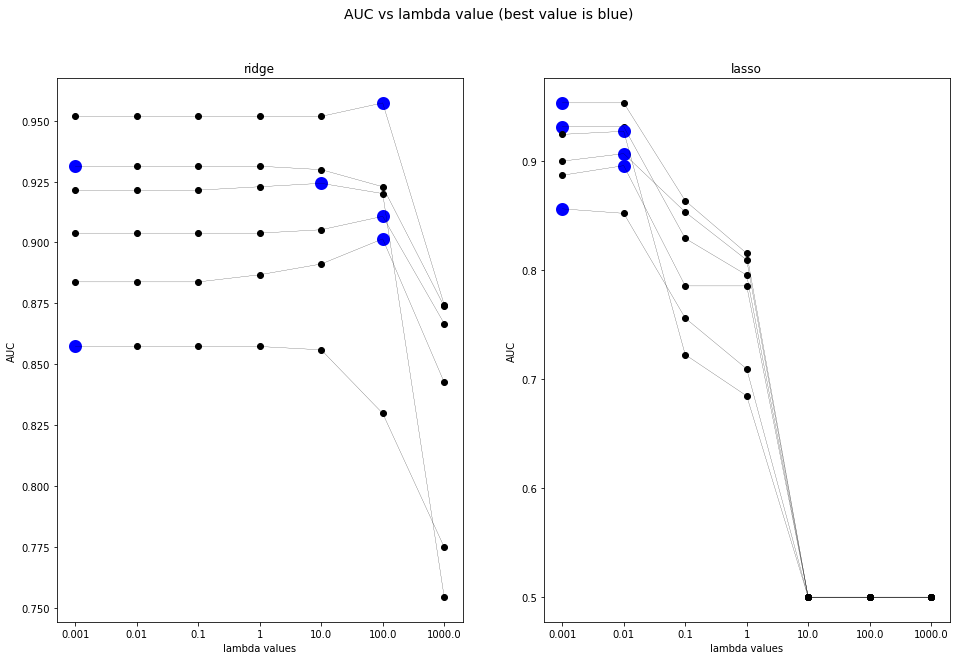

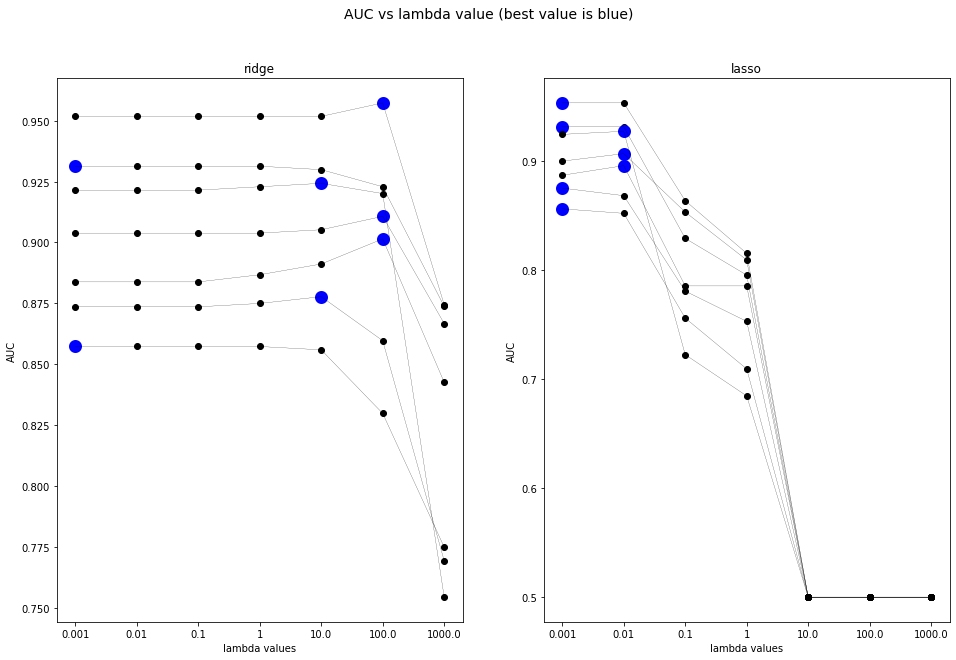

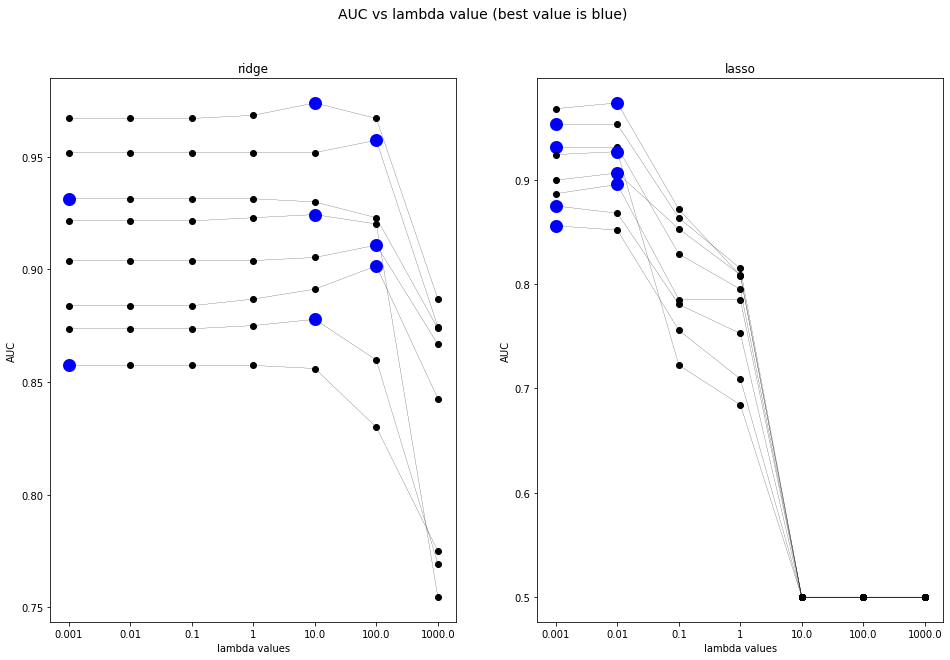

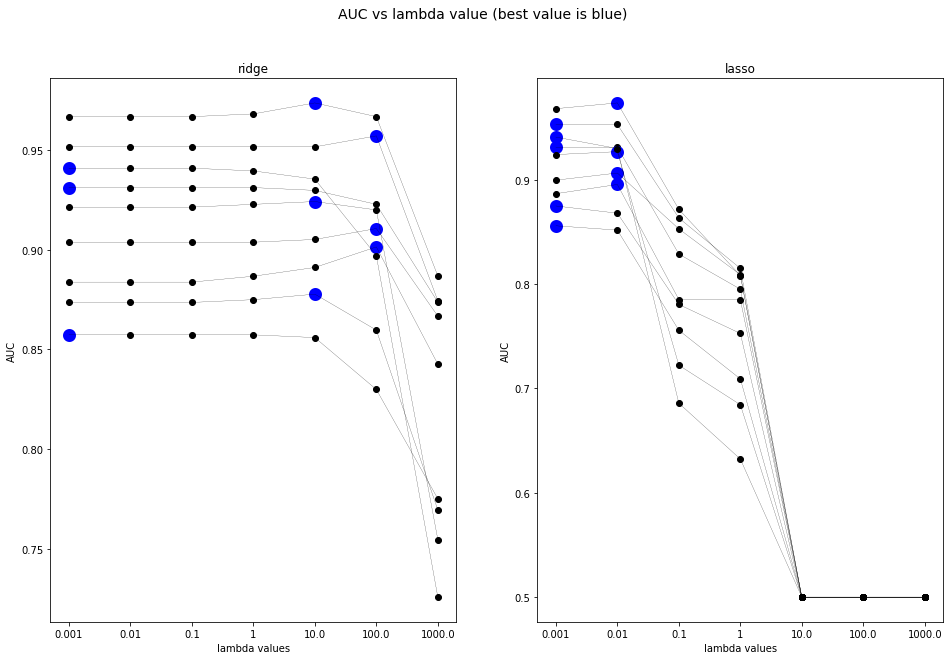

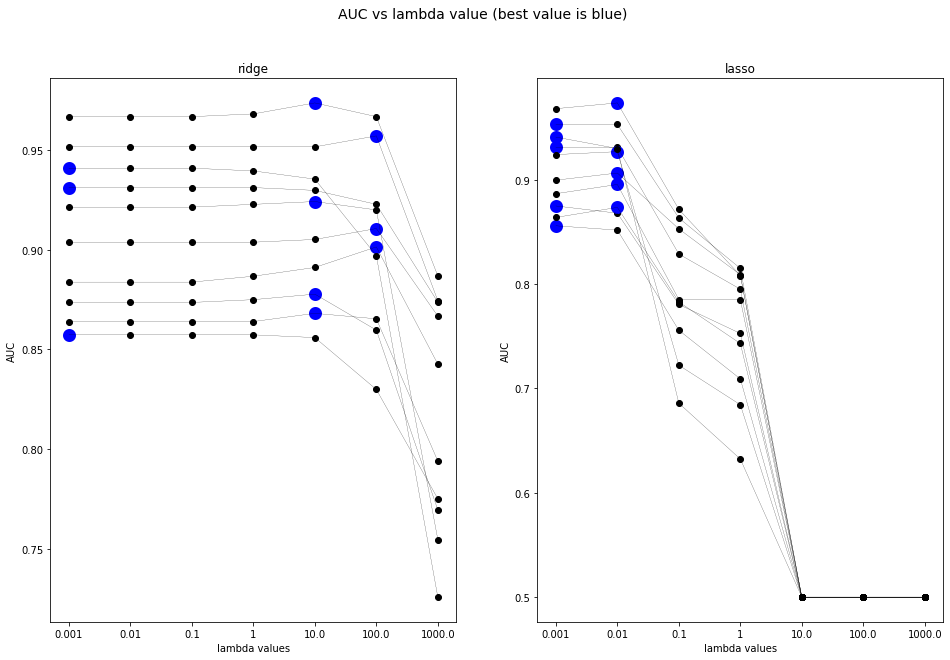

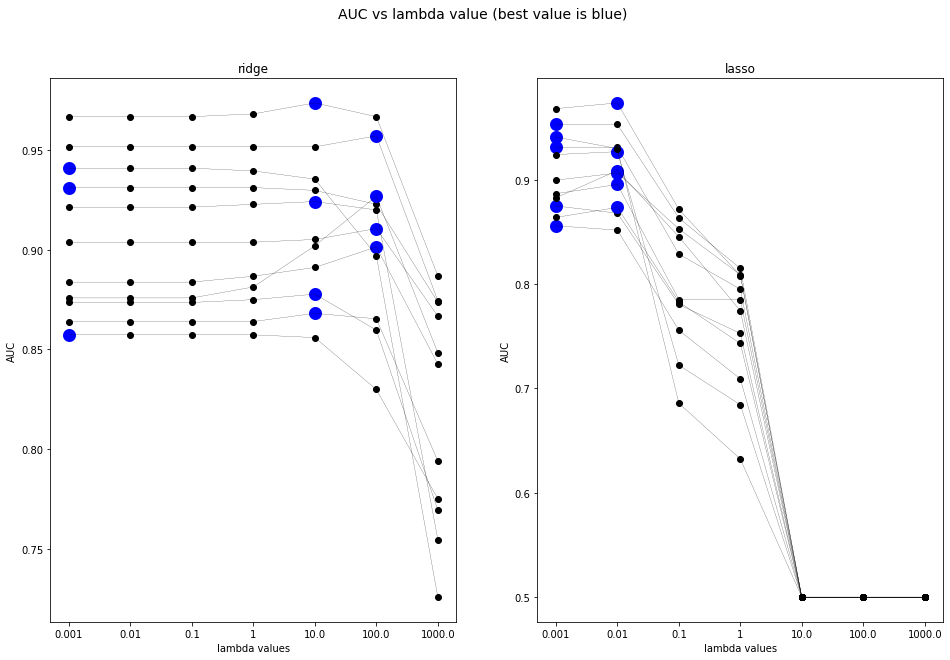

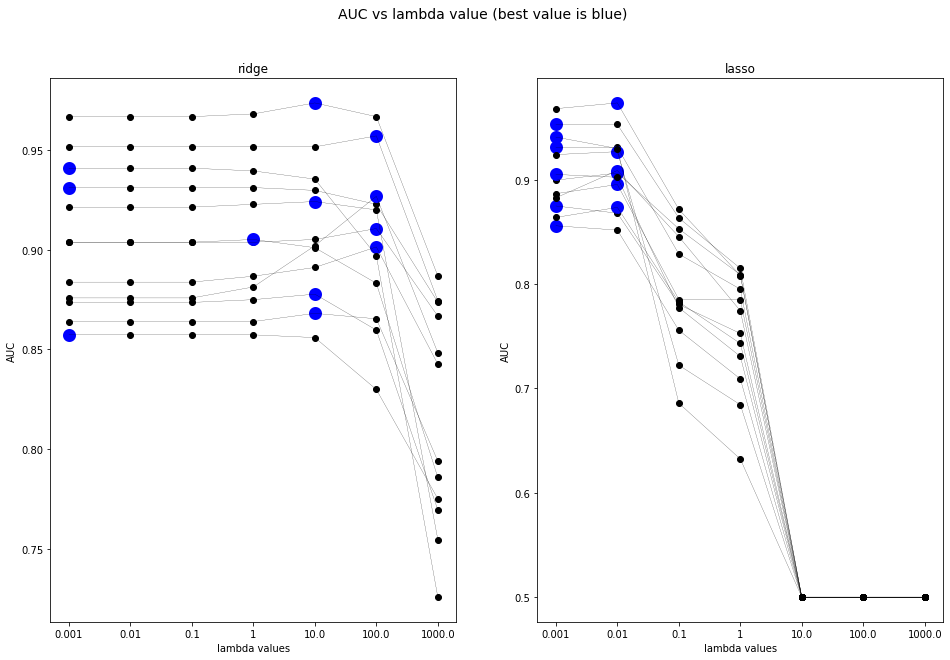

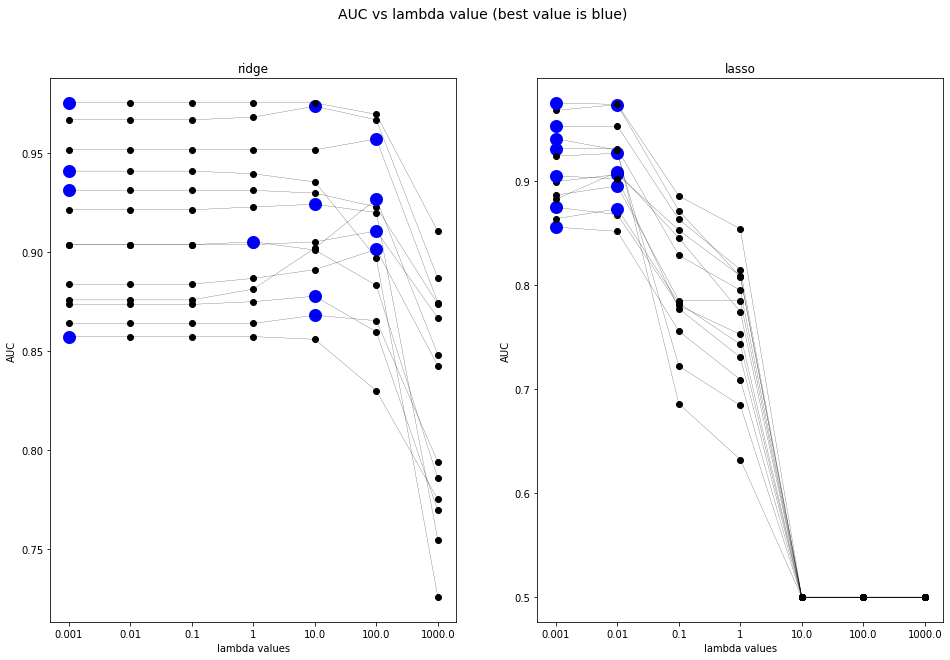

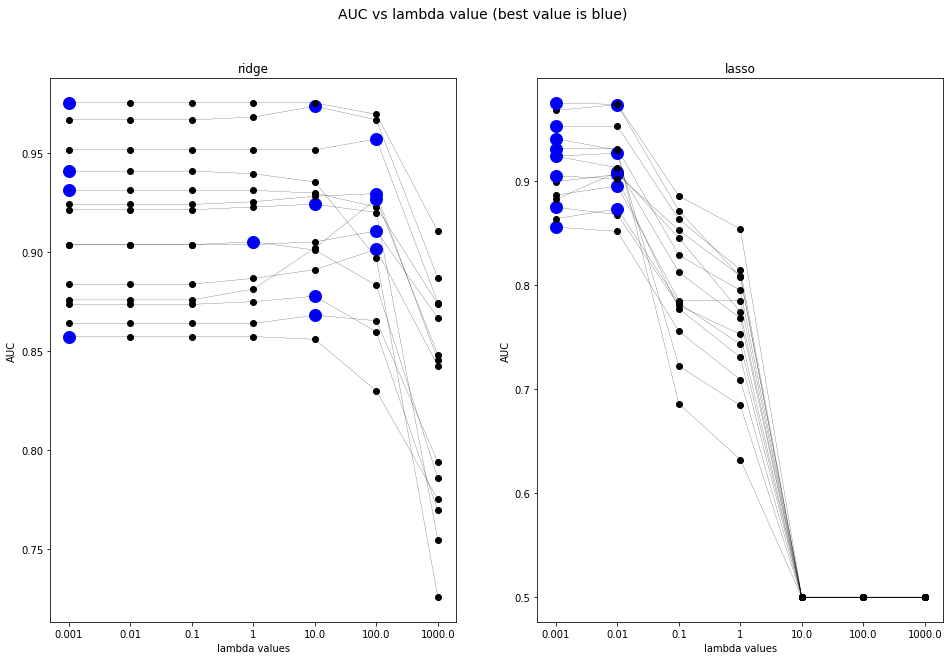

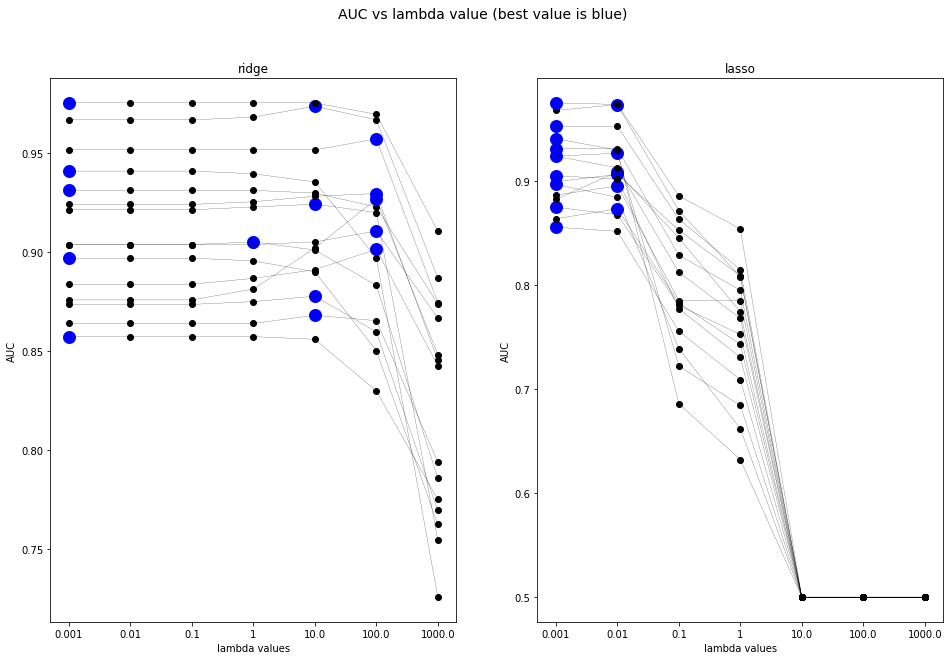

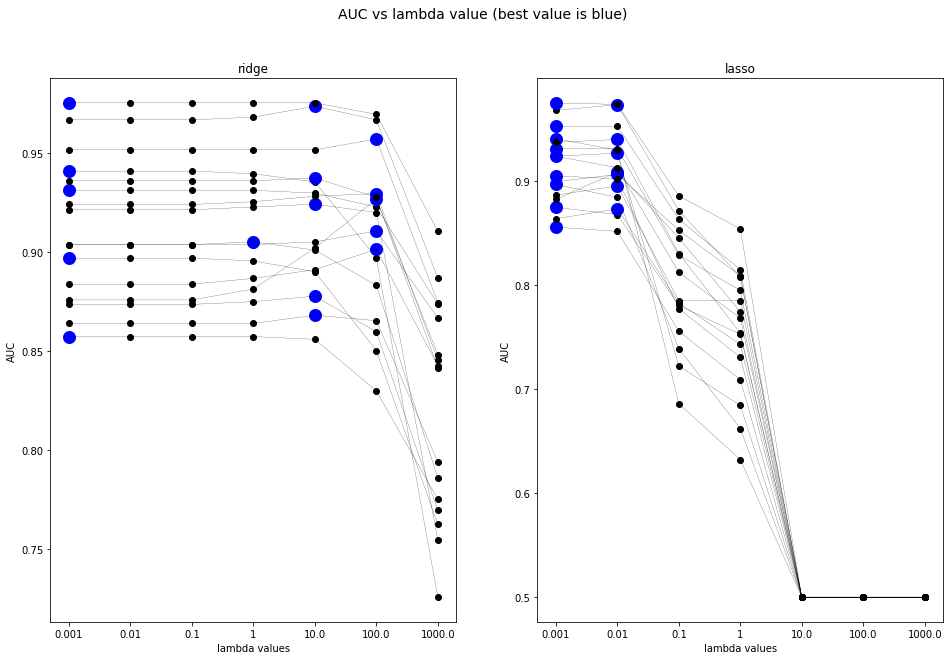

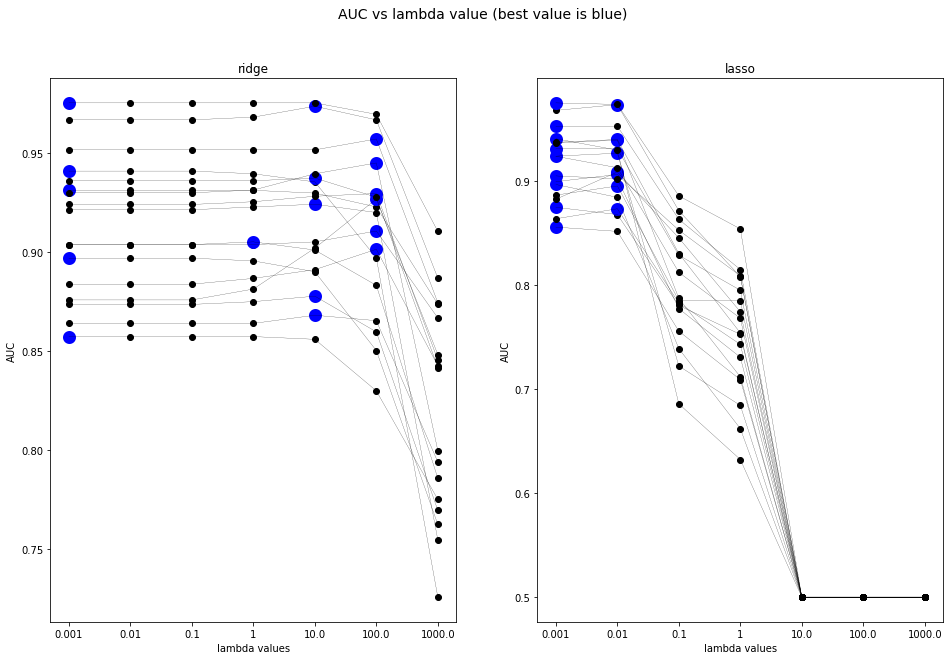

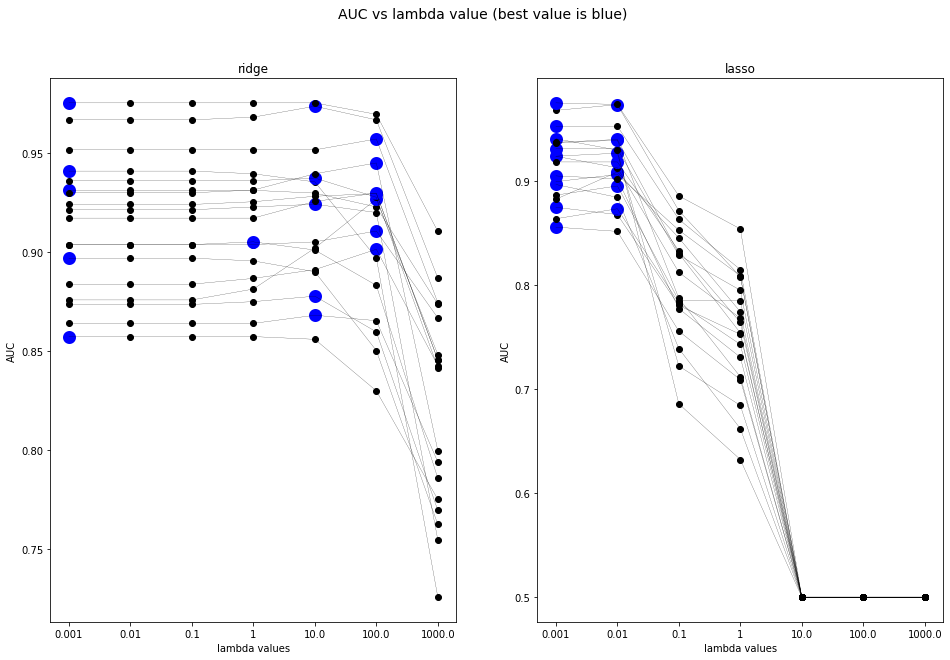

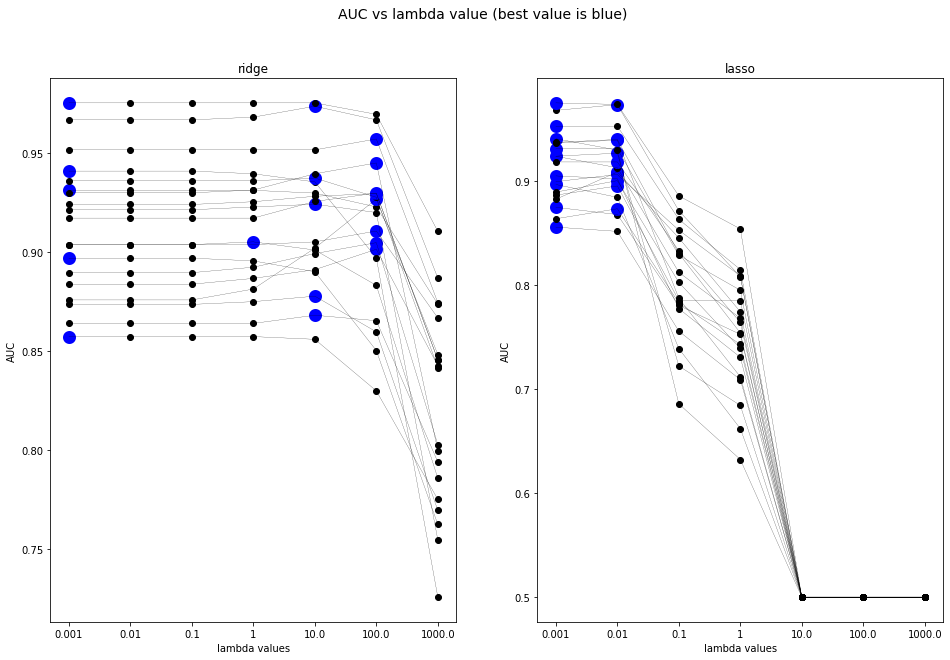

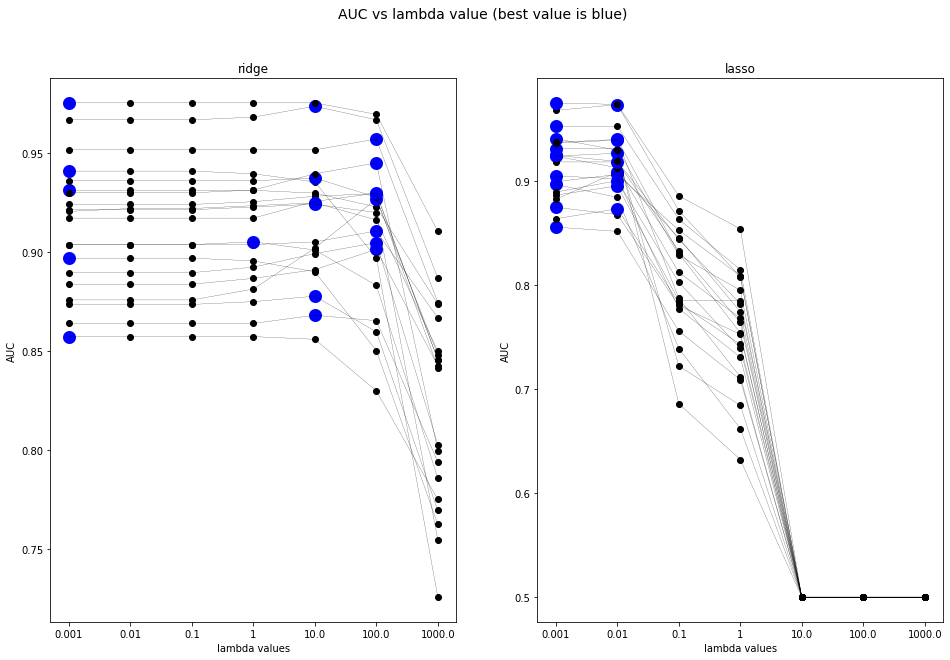

In [6]:
def plot_auc_subplot(ax, auc, model):
    best_lambda_index = np.argmax(auc)
    ax.scatter(range(1, len(auc)+1), auc, color='black')
    ax.plot(range(1, len(auc)+1), auc, linewidth=0.2, color = 'black')
    ax.scatter(best_lambda_index+1, auc[best_lambda_index], color='blue', linewidth=7)
    
    plt.sca(ax)
    plt.title(model)
    plt.xlabel('lambda values')
    plt.xticks(range(1, len(lambda_vals)+1), lambda_vals)
    plt.ylabel('AUC')
    

for i in range(1,21):
    fig, axs = plt.subplots(1,2,figsize=(16,10))
    fig.suptitle("AUC vs lambda value (best value is blue)", fontsize=14)
    for j in range(i):
        auc_ridge = np.asarray(aucs["ridge"][j])
        auc_lasso = np.asarray(aucs["lasso"][j])

        plot_auc_subplot(axs[0], auc_ridge, "ridge")
        plot_auc_subplot(axs[1], auc_lasso, "lasso")


4) These models seem to do very similar to the logistic and linear models from homework 2. However, they seem to be better at assigning weights to the coefficients effectively.

In [7]:
ridge_aucs=pd.DataFrame(aucs["ridge"])
lasso_aucs=pd.DataFrame(aucs["lasso"])
print ("ridge max AUC:")
for lambda_val, ridge_auc in zip(lambda_vals, ridge_aucs.max()):
    print ("Lambda:", lambda_val, "AUC:", "%.2f"%ridge_auc)

    
print ("\nlasso max AUC:")
for lambda_val, lasso_auc in zip(lambda_vals, lasso_aucs.max()):
    print (lambda_val, "AUC:", "%.2f"%lasso_auc)


ridge max AUC:
Lambda: 0.001 AUC: 1.00
Lambda: 0.01 AUC: 1.00
Lambda: 0.1 AUC: 1.00
Lambda: 1 AUC: 1.00
Lambda: 10.0 AUC: 1.00
Lambda: 100.0 AUC: 1.00
Lambda: 1000.0 AUC: 0.96

lasso max AUC:
0.001 AUC: 1.00
0.01 AUC: 1.00
0.1 AUC: 0.94
1 AUC: 0.91
10.0 AUC: 0.50
100.0 AUC: 0.50
1000.0 AUC: 0.50


#### Problem 5

In [8]:
x_train, y_train = load_svmlight_file("satimage.scale.training")
x_train = pd.DataFrame(x_train.todense())
y_train = pd.DataFrame(y_train)
x_test, y_test = load_svmlight_file("satimage.scale")
x_test = pd.DataFrame(x_test.todense())
y_test = pd.DataFrame(y_test)
y_train = y_train.replace({1:0, 2:0, 3:0, 4:0, 5:0,6:1})
y_test = y_test.replace({1:0, 2:0, 3:0, 4:0, 5:0,6:1})


In [9]:
def cross_validate_single_kernel(X, y, kernel, n_folds, args):
    
    auc = 0
    skf=StratifiedKFold(n_splits=n_folds, shuffle=True)
    for train_index, test_index in skf.split(X, y):
        print("Still running")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()

        print ("  *")
        ##normalization
        X_train_min, X_train_max = X_train.min(), X_train.max()
        X_train = (X_train - X_train_min)/(X_train_max-X_train_min)
        X_test  = (X_test  - X_train_min)/(X_train_max-X_train_min)

        X_train = X_train[X_train.columns[~(X_train_min==X_train_max)]]
        X_test  = X_test [X_test.columns[~(X_train_min==X_train_max)]]

        ##train/test
        svm = SVC(C=args["c_val"], kernel=kernel, tol=1e-7, shrinking=False, gamma=args["gamma_val"], degree = args["d_val"])
        svm.fit(X_train, y_train)

        pred   =   svm.predict(X_test)
        auc   += roc_auc_score(y_test, pred)/n_folds
    
    return auc

In [10]:
num_processes = 60

def cross_validate_kernels(X, y, kernel, n_folds, args):
    
    for key in args.keys():
        if len(args[key])==0:
            args[key]=[1]

    results = Parallel(n_jobs=num_processes)(delayed(cross_validate_single_kernel)\
              (X, y, kernel, n_folds,{"c_val":c_val, "gamma_val":gamma_val, "d_val":d_val})\
              for (c_val, gamma_val, d_val) in product(args["c_vals"], args["gamma_vals"], args["d_vals"]))
    
    names   = ["kernel:%s__log10_C:%s_log10_gamma:%s__degree:%s"%(kernel, str(np.log10(c_val)), str(np.log10(gamma_val)), str(d_val))\
              for (c_val, gamma_val, d_val) in product(args["c_vals"], args["gamma_vals"], args["d_vals"])]
    
    auc_dict = dict(zip(names, results))
        
    return auc_dict

In [11]:
import os

rslt_addr = "./results/"
if not os.path.exists(rslt_addr):
    os.makedirs(rslt_addr)

In [12]:
def name_creator(kernel, n_folds, args):

    name = "kernel%s__n_folds%d"%(kernel, n_folds)
    
    def describe_in_string(vec, is_degree=False):
        
        if len(vec)==0:
            return "NA"
        
        if not is_degree:
            vec = np.log10(vec)
            
        if len(vec)==1:
            return "%d"%vec[0]
    
        return "%d~%d"%(np.min(vec), np.max(vec))
    
    for arg in sorted(args.keys()):
        if arg!="d_vals":
            name += "__log10_%s%s"%(arg, describe_in_string(args[arg]))
        else:
            name += "__%s%s"%(arg, describe_in_string(args[arg], True))
    
    return name

In [14]:
import pickle
import os
import numpy as np

def load_it_or_compute_it (X, y, kernel, n_folds, args):
    
    rslt_dict_name = name_creator(kernel, n_folds, args)
    rslt_dict_addr = os.path.join(rslt_addr, rslt_dict_name)
    
    print (rslt_dict_name)
    
    if os.path.isfile(rslt_dict_addr):
        with open(rslt_dict_addr,"rb") as rslt_dict_handle:
            rslt_dict = pickle.load(rslt_dict_handle)
    else:
        rslt_dict = cross_validate_kernels(X, y, kernel, n_folds, args)
        with open(rslt_dict_addr,"wb") as rslt_dict_handle:
            pickle.dump(rslt_dict, rslt_dict_handle)

    return rslt_dict

In [15]:
# c_vals     = np.power(float(10), range(-1, 1+1))
# print(c_vals)
c_vals = [0.01, 0.1, 1, 10,100]
# gamma_vals = np.power(float(10), range(-1, 1+1))
gamma_vals = []
d_vals     = [1,2,3,4]

returned_dict = load_it_or_compute_it (x_train, y_train, "poly", 10, {"c_vals":c_vals, "gamma_vals":gamma_vals, "d_vals":d_vals})
print(returned_dict)

kernelpoly__n_folds10__log10_c_vals-2~2__d_vals1~4__log10_gamma_valsNA
{'kernel:poly__log10_C:-2.0_log10_gamma:0.0__degree:1': 0.8348873346320822, 'kernel:poly__log10_C:-2.0_log10_gamma:0.0__degree:2': 0.8605478913990864, 'kernel:poly__log10_C:-2.0_log10_gamma:0.0__degree:3': 0.8756081095090789, 'kernel:poly__log10_C:-2.0_log10_gamma:0.0__degree:4': 0.896001703198678, 'kernel:poly__log10_C:-1.0_log10_gamma:0.0__degree:1': 0.8503671866910761, 'kernel:poly__log10_C:-1.0_log10_gamma:0.0__degree:2': 0.8687509673878209, 'kernel:poly__log10_C:-1.0_log10_gamma:0.0__degree:3': 0.890071602735485, 'kernel:poly__log10_C:-1.0_log10_gamma:0.0__degree:4': 0.8995645131693686, 'kernel:poly__log10_C:0.0_log10_gamma:0.0__degree:1': 0.8621653074640998, 'kernel:poly__log10_C:0.0_log10_gamma:0.0__degree:2': 0.8778364130024179, 'kernel:poly__log10_C:0.0_log10_gamma:0.0__degree:3': 0.8950566113020183, 'kernel:poly__log10_C:0.0_log10_gamma:0.0__degree:4': 0.8935749525344977, 'kernel:poly__log10_C:1.0_log10_ga

In [16]:
degree_1 = {}
degree_2 = {}
degree_3 = {}
degree_4 = {}
dicts = [degree_1, degree_2, degree_3, degree_4]
for key,val in returned_dict.items():
    if "degree:1" in key:
        degree_1[key] = val
    if "degree:2" in key:
        degree_2[key] = val
    if "degree:3" in key:
        degree_3[key] = val
    if "degree:4" in key:
        degree_4[key] = val
# print(degree_1)
for dictionary in dicts:
    for key in list(dictionary):
#         print(key)
        if 'C:-2.0' in key:
            dictionary[0.01] = dictionary.pop(key)
        if 'C:-1.0' in key:
            dictionary[0.1] = dictionary.pop(key)
        if 'C:0.0' in key:
            dictionary[1] = dictionary.pop(key)
        if 'C:1.0' in key:
            dictionary[10] = dictionary.pop(key)
        if 'C:2.0' in key:
            dictionary[100] = dictionary.pop(key)
# print(degree_1)
degree_1_vals = list(degree_1.values())
degree_2_vals = list(degree_2.values())
degree_3_vals = list(degree_3.values())
degree_4_vals = list(degree_4.values())

In [17]:
from statistics import stdev, mean
degree1stdev = stdev(degree_1_vals)
degree2stdev = stdev(degree_2_vals)
degree3stdev = stdev(degree_3_vals)
degree4stdev = stdev(degree_4_vals)

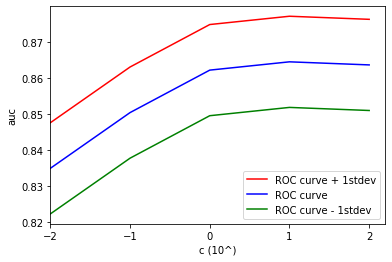

In [18]:
c_vals = [-2,-1,0,1,2]
degree_1_plot = [x + degree1stdev for x in degree_1_vals]
plt.plot(c_vals,degree_1_plot, 'r',label='ROC curve + 1stdev')
plt.plot(c_vals, degree_1_vals, 'b',label='ROC curve')
degree_1_plot = [x - degree1stdev for x in degree_1_vals]
plt.plot(c_vals,degree_1_plot, 'g',label='ROC curve - 1stdev')
plt.xlim(-2,None)
plt.xlabel('c (10^)')
plt.ylabel('auc')
plt.locator_params(axis='x', nbins=5)
plt.legend(loc="lower right")
plt.show()

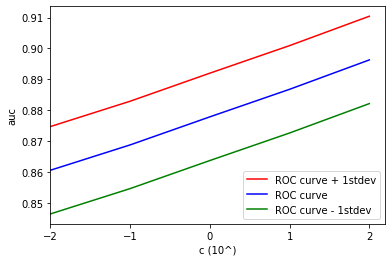

In [19]:
degree_2_plot = [x + degree2stdev for x in degree_2_vals]
plt.plot(c_vals,degree_2_plot, 'r',label='ROC curve + 1stdev')
plt.plot(c_vals, degree_2_vals, 'b',label='ROC curve')
degree_2_plot = [x - degree2stdev for x in degree_2_vals]
plt.plot(c_vals,degree_2_plot, 'g',label='ROC curve - 1stdev')
plt.xlim(-2,None)
plt.xlabel('c (10^)')
plt.ylabel('auc')
plt.locator_params(axis='x', nbins=5)
plt.legend(loc="lower right")
plt.show()

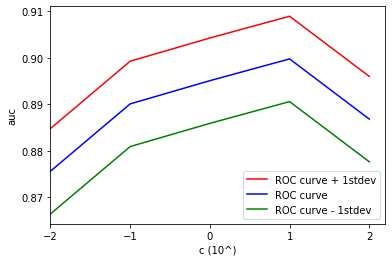

In [20]:
degree_3_plot = [x + degree3stdev for x in degree_3_vals]
plt.plot(c_vals,degree_3_plot, 'r',label='ROC curve + 1stdev')
plt.plot(c_vals, degree_3_vals, 'b',label='ROC curve')
degree_3_plot = [x - degree3stdev for x in degree_3_vals]
plt.plot(c_vals,degree_3_plot, 'g',label='ROC curve - 1stdev')
plt.xlim(-2,None)
plt.xlabel('c (10^)')
plt.ylabel('auc')
plt.locator_params(axis='x', nbins=5)
plt.legend(loc="lower right")
plt.show()

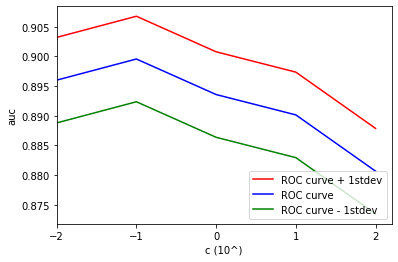

In [21]:
degree_4_plot = [x + degree4stdev for x in degree_4_vals]
plt.plot(c_vals,degree_4_plot, 'r',label='ROC curve + 1stdev')
plt.plot(c_vals, degree_4_vals, 'b',label='ROC curve')
degree_4_plot = [x - degree4stdev for x in degree_4_vals]
plt.plot(c_vals,degree_4_plot, 'g',label='ROC curve - 1stdev')
plt.xlim(-2,None)
plt.xlabel('c (10^)')
plt.ylabel('auc')
plt.locator_params(axis='x', nbins=5)
plt.legend(loc="lower right")
plt.show()

In [22]:
final_optimal_pairs = {}
def get_key(val, my_dict): 
    for key, value in my_dict.items(): 
         if val == value: 
                return key
dicts = [degree_1, degree_2, degree_3, degree_4]
for x in range(0,4):
    final_optimal_pairs[x+1] = get_key(max(dicts[x].values()),dicts[x])
print(final_optimal_pairs)


{1: 10, 2: 100, 3: 10, 4: 0.1}


In [23]:
def full_dataset(x_train,x_test, y_train,y_test, kernel, c, degree): 
    auc = 0
    svm = SVC(C=c, kernel=kernel, tol=1e-7, shrinking=False, degree = degree)
    svm.fit(x_train, y_train)
    pred   =   svm.predict(x_test)
    auc   += roc_auc_score(y_test, pred)
    score = svm.score(x_test,y_test)
    svm_count = len(svm.support_vectors_)
    return [auc,1-score, svm_count]

In [24]:
auc_dict = {}
for key, value in final_optimal_pairs.items():
    auc_dict[key] = full_dataset(x_train,x_test,y_train, y_test, "poly", value, key)
print(auc_dict)

{1: [0.8695803222042797, 0.08500563697857944, 972], 2: [0.9338332927784517, 0.049605411499436314, 714], 3: [0.9174959147337869, 0.05208568207440811, 803], 4: [0.7934595185710162, 0.10169109357384443, 1353]}


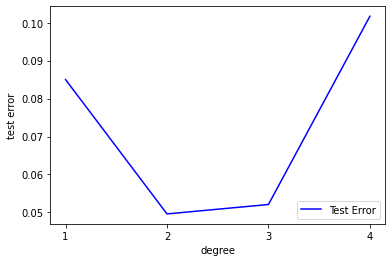

In [25]:
plot1 = []
plot2 = []
for key, value in auc_dict.items():
    plot1.append(key)
    plot2.append(value[1])
plt.plot(plot1,plot2, 'b',label='Test Error')
plt.locator_params(axis='x', nbins=4)
plt.xlabel('degree')
plt.ylabel('test error')
plt.legend(loc="lower right")
plt.show()

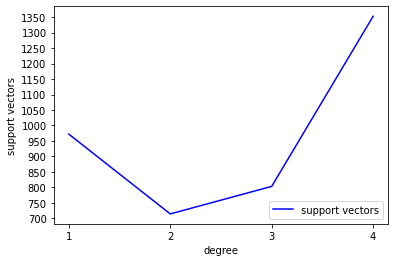

In [26]:
plot1 = []
plot2 = []
for key, value in auc_dict.items():
    plot1.append(key)
    plot2.append(value[2])
plt.plot(plot1,plot2, 'b',label='support vectors')
plt.locator_params(axis='x', nbins=4)
plt.locator_params(axis='y', nbins=20)
plt.xlabel('degree')
plt.ylabel('support vectors')
plt.legend(loc="lower right")
plt.show()

In [27]:
c_vals = list(final_optimal_pairs.values())
for i in range(0,len(plot1)):
    print("The number of support vectors in the margin hyperplane for degree {} is {}. The c value for this degree is {}".format(plot1[i], plot2[i], c_vals[i]))

The number of support vectors in the margin hyperplane for degree 1 is 972. The c value for this degree is 10
The number of support vectors in the margin hyperplane for degree 2 is 714. The c value for this degree is 100
The number of support vectors in the margin hyperplane for degree 3 is 803. The c value for this degree is 10
The number of support vectors in the margin hyperplane for degree 4 is 1353. The c value for this degree is 0.1


5f) The degree of the polynomial kernel dictates how the kernel function is optimized to better classify the data. As we can see from degree 1 and degree 3, the number of support vectors reduces. We cannot see this for the other degrees as the slack variable c is different. We see that increasing degree, the classifier becomes more flexible. When c or the degree is increased we will get a smaller margin size, which means that we will have fewer support vectors. However, very large degrees or penalties will lead to the model being overfitted, with low bias and high variance and increasing the support vectors.

5g) Low gamma in the rbf kernel will reduce the curve of the decision boundary. When gamma is increased, it will start being dependent on individual data points, increasing variance, reducing bias and causing the model to become overfitted, increasing the number of support vectors.